In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pyglstudy as gl
from pyglstudy.group_lasso import *
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy

In [15]:
n = 100
p = 10000
n_groups = int(p/10)
alpha = 1.0
seed = 0

np.random.seed(seed)
X, beta, y, groups, group_sizes = generate_group_lasso_data(n, p, n_groups).values()

# IMPORTANT: pack must be created before calling the next cell.
# group_lasso will modify the pack details
pack = generate_group_lasso_state(
    X, y, groups, group_sizes, alpha, 
    log10_min_ratio=-2, 
    max_cds=int(1e5),
    newton_max_iters=10000,
)

In [16]:
pack1 = deepcopy(pack)
pack2 = deepcopy(pack)
pack3 = deepcopy(pack)

In [17]:
%%time
gl_out = group_lasso(X, pack1, fit_type='data')

CPU times: user 196 ms, sys: 0 ns, total: 196 ms
Wall time: 69.7 ms


In [18]:
%%time
gl_out2 = group_lasso(X, pack2, fit_type='data_newton')

CPU times: user 199 ms, sys: 0 ns, total: 199 ms
Wall time: 69.5 ms


In [19]:
A = np.asfortranarray(X.T @ X)

In [20]:
%%time
gl_out3 = group_lasso(A, pack3, fit_type='full_cov')

CPU times: user 62 ms, sys: 2.74 ms, total: 64.8 ms
Wall time: 64.7 ms


In [21]:
gl_out['rsqs'] / np.linalg.norm(y) ** 2,  gl_out2['rsqs'] / np.linalg.norm(y) ** 2

(array([0.        , 0.08162691, 0.15600241, 0.22377067, 0.28551869,
        0.34178127, 0.39304575, 0.43975615, 0.48231703, 0.52109704,
        0.55643206, 0.58862815, 0.61796416, 0.64469419, 0.66904974,
        0.69124177, 0.71146248, 0.72988701, 0.74667494, 0.76197167,
        0.77590967, 0.78860966, 0.80018164, 0.81072582, 0.82033353,
        0.82908796, 0.83706493, 0.84433353, 0.85095668, 0.85699176,
        0.86249101, 0.86750205, 0.87206826, 0.87622919, 0.88002085,
        0.88347607, 0.88662475, 0.88949414, 0.89210908, 0.89449219,
        0.89666409, 0.89864357, 0.90044774, 0.90209221, 0.9035912 ,
        0.90495764, 0.90620335, 0.90733909, 0.90837465, 0.90931898,
        0.91018021, 0.91096575, 0.91168239, 0.91233627, 0.91293301,
        0.91347775, 0.91397513, 0.91442943, 0.91484452, 0.91522393,
        0.9155709 , 0.91588837, 0.91617901, 0.91644528, 0.91668942,
        0.91691345, 0.91711925, 0.91730851, 0.91748278, 0.91764348,
        0.91779191, 0.91792925, 0.91805659, 0.91

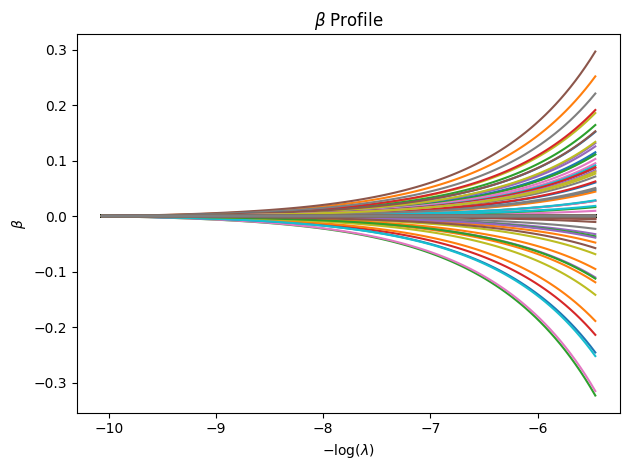

In [22]:
min_idx = np.unravel_index(np.argmin(gl_out['betas']), shape=gl_out['betas'].shape)[0]
max_idx = np.unravel_index(np.argmax(gl_out['betas']), shape=gl_out['betas'].shape)[0]

for j in range(gl_out['betas'].shape[0]):
    if j == min_idx or j == max_idx: continue
    plt.plot(-np.log(gl_out['lmdas']), gl_out['betas'][j].todense().reshape((-1,1)))
plt.title('$\\beta$ Profile')
plt.xlabel('$-\log(\lambda)$')
plt.ylabel('$\\beta$')
plt.tight_layout()
plt.show()

In [23]:
np.max(gl_out['betas']-gl_out3['betas']), np.max(gl_out2['betas'] - gl_out3['betas'])

(8.881784197001252e-16, 2.567033252631745e-09)